In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
# Load dataset
df = pd.read_csv(r"C:\Users\soura\Downloads\freecodecamp-intro-to-numpy-master\Python-Elective\W33836-XLS-ENG.csv")
print(df.head())
print(df.info())  # Check data types and missing values
print(df.tail())

     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  09-04-2012       58       635  ...                  7             0   
1  03-08-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  02-10-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0

In [3]:

df.tail()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,06-10-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0
2239,9405,1954,PhD,Married,52869.0,1,1,15-10-2012,40,84,...,7,0,0,0,0,0,0,3,11,1


In [4]:
# Convert date column 'Dt_Customer' to datetime format and calculate customer tenure
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], errors='coerce')  # Handle non-standard date formats
df['Customer_Tenure'] = (pd.to_datetime('today') - df['Dt_Customer']).dt.days / 365  # Tenure in years

# Drop the original 'Dt_Customer' column
df.drop(columns=['Dt_Customer'], inplace=True)

# Convert categorical columns to dummy variables
categorical_cols = ['Education', 'Marital_Status']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Fill or drop missing values if necessary
df.fillna(df.mean(), inplace=True)

In [11]:
def safe_division(numerator, denominator):
    if denominator == 0:
        return 0  # Return 0 if denominator is zero
    else:
        return (numerator / denominator) * 100



In [12]:
#Col 1 -> Percentage of web purchases to visit 

# Apply the function to calculate WebsiteStickinessPct
df['WebsiteStickinessPct'] = df.apply(lambda row: safe_division(row['NumWebPurchases'], row['NumWebVisitsMonth']), axis=1)
# df['WebsiteStickinessPct'] = (df['NumWebPurchases']/df['NumWebVisitsMonth'])*100


#Col 2 -> Total number of Campaigns accepted across the 5
cols_campaigns = ['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5']
df['TotalAcceptedCampaigns'] =  df[cols_campaigns].sum(axis = 1)

#Col 3 -> Deals used to number of accepted campaigns as a percentage
# Apply the function to calculate WebsiteStickinessPct
df['DealsPurchaseToAcceptedCampaignsPct'] = df.apply(lambda row: safe_division(row['NumDealsPurchases'], row['TotalAcceptedCampaigns']), axis=1)
# df['DealsPurchaseToAcceptedCampaignsPct'] = (df['NumDealsPurchases']/df['TotalAcceptedCampaigns'])*100

#Col 4 -> Customer Age
df ['Age'] = pd.to_datetime('today').year - df['Year_Birth']

#Col 4 -> Correlation of Income to Luxury items like Wine, Gold
cols_LuxuryItems = ['MntWines','MntGoldProds']
cols_EssentialItems = ['MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts']
#Hypothesis is a luxury purchase
df['LuxuryItemPurchaseToEssentialItemsPurchase'] = df[cols_LuxuryItems].sum(axis=1)/df[cols_EssentialItems].sum(axis=1)
average_ratio = df['LuxuryItemPurchaseToEssentialItemsPurchase'].mean()
totalLuxuryItemSpends = df[cols_LuxuryItems].sum()



In [6]:
df['Income'].corr(df['LuxuryItemPurchaseToEssentialItemsPurchase'])

np.float64(0.003550994234608728)

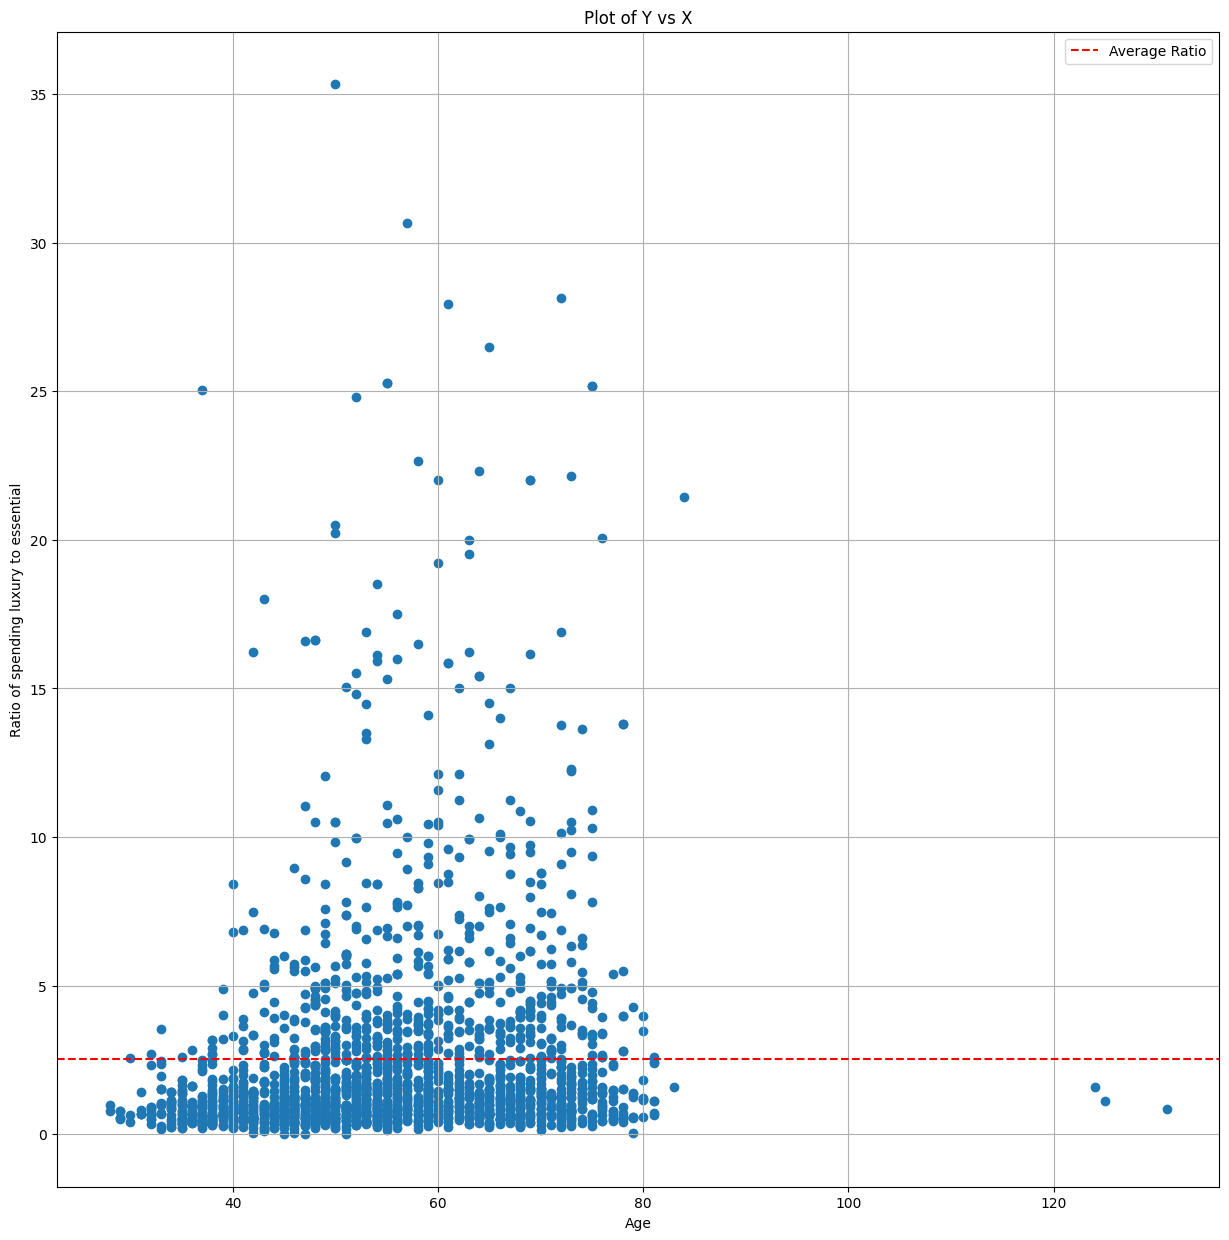

In [7]:
#plotting

 
plt.figure(figsize=(15, 15))
plt.scatter(df['Age'],df['LuxuryItemPurchaseToEssentialItemsPurchase'], marker='o')  # Line plot with points
plt.axhline(y=average_ratio, color='red', linestyle='--', label='Average Ratio')
plt.title('Plot of Y vs X')
plt.xlabel('Age')
plt.ylabel('Ratio of spending luxury to essential')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
df.head()
min(df['Year_Birth'])

In [8]:
df.corr()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,WebsiteStickinessPct,TotalAcceptedCampaigns,DealsPurchaseToAcceptedCampaignsPct,Age,LuxuryItemPurchaseToEssentialItemsPurchase
ID,1.000000,0.000028,0.013036,0.002406,-0.002580,-0.046524,-0.022878,0.004600,-0.004437,-0.024475,...,0.010007,-0.016558,0.009563,0.021937,2.029264e-03,0.006021,-0.036883,-0.067801,-0.000028,0.003025
Year_Birth,0.000028,1.000000,-0.160942,0.230176,-0.352111,-0.019871,-0.157773,-0.017917,-0.030872,-0.041625,...,0.051193,0.116978,-0.052258,-0.161370,1.046469e-02,-0.104204,-0.000301,-0.126355,-1.000000,-0.168297
Income,0.013036,-0.160942,1.000000,-0.425176,0.019018,-0.003946,0.576789,0.428747,0.577802,0.437497,...,-0.016399,-0.025628,0.023288,0.031501,-4.556265e-03,0.467753,0.307098,-0.424089,0.160942,0.003551
Kidhome,0.002406,0.230176,-0.425176,1.000000,-0.036133,0.008827,-0.496297,-0.372581,-0.437129,-0.387644,...,0.017403,0.019779,0.006373,-0.073760,-2.466911e-02,-0.386225,-0.211892,0.400633,-0.230176,-0.071458
Teenhome,-0.002580,-0.352111,0.019018,-0.036133,1.000000,0.016198,0.004846,-0.176764,-0.261160,-0.204187,...,0.007749,-0.095925,0.025038,0.045093,2.711194e-02,-0.122791,-0.127759,0.534676,0.352111,0.337341
Recency,-0.046524,-0.019871,-0.003946,0.008827,0.016198,1.000000,0.016064,-0.004306,0.023056,0.001079,...,-0.022757,0.007158,0.020363,0.000218,-4.760316e-02,-0.029327,-0.012570,-0.029271,0.019871,-0.024366
MntWines,-0.022878,-0.157773,0.576789,-0.496297,0.004846,0.016064,1.000000,0.389637,0.562667,0.399753,...,-0.010491,-0.024216,0.005077,0.036632,1.604693e-03,0.395498,0.512358,-0.222151,0.157773,0.177429
MntFruits,0.004600,-0.017917,0.428747,-0.372581,-0.176764,-0.004306,0.389637,1.000000,0.543105,0.594804,...,-0.011304,0.007002,-0.014155,0.032211,-1.751807e-02,0.386288,0.161002,-0.315191,0.017917,-0.241532
MntMeatProducts,-0.004437,-0.030872,0.577802,-0.437129,-0.261160,0.023056,0.562667,0.543105,1.000000,0.568402,...,-0.022011,0.035079,0.003021,0.018675,-1.549248e-02,0.469808,0.309313,-0.433212,0.030872,-0.233823
MntFishProducts,-0.024475,-0.041625,0.437497,-0.387644,-0.204187,0.001079,0.399753,0.594804,0.568402,1.000000,...,-0.031116,0.006609,0.015865,0.047894,-1.834989e-02,0.396804,0.177830,-0.336704,0.041625,-0.256608


In [13]:

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.select_dtypes(include=[np.number]))  # Scale only numeric columns
scaled_df = pd.DataFrame(scaled_features, columns=df.select_dtypes(include=[np.number]).columns)

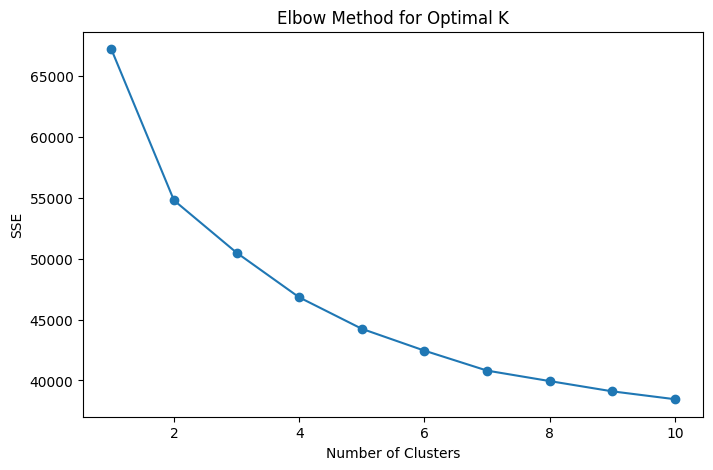

In [14]:
# Determine the optimal number of clusters using the Elbow method
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_df)
    sse.append(kmeans.inertia_)

# Plot the SSE to find the "elbow"
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.show()

# Assuming the optimal number of clusters is chosen from the elbow plot, let's say it’s 4
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_df)

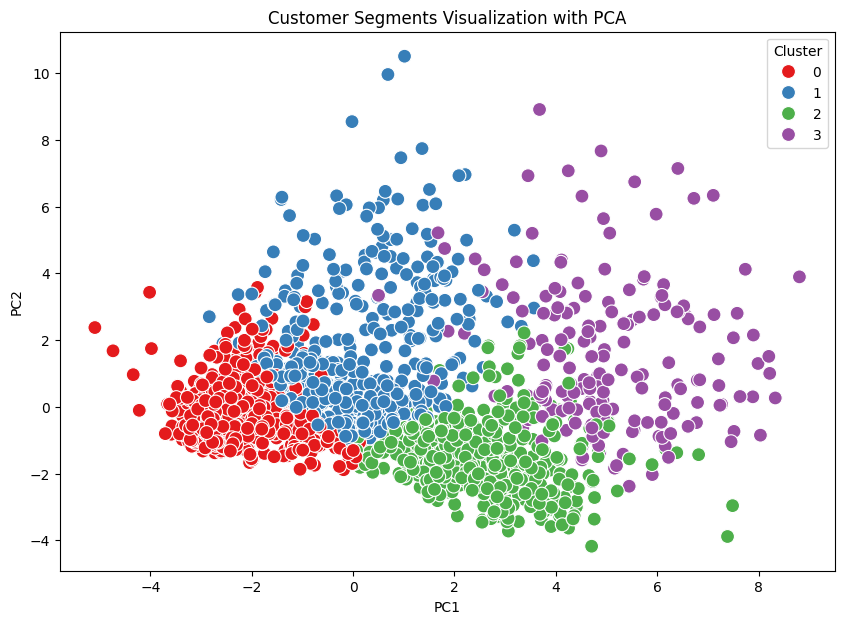

In [15]:
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_df)
pca_df = pd.DataFrame(data=pca_components, columns=['PC1', 'PC2'])
pca_df['Cluster'] = df['Cluster']

# Plot clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df, palette='Set1', s=100)
plt.title('Customer Segments Visualization with PCA')
plt.show()

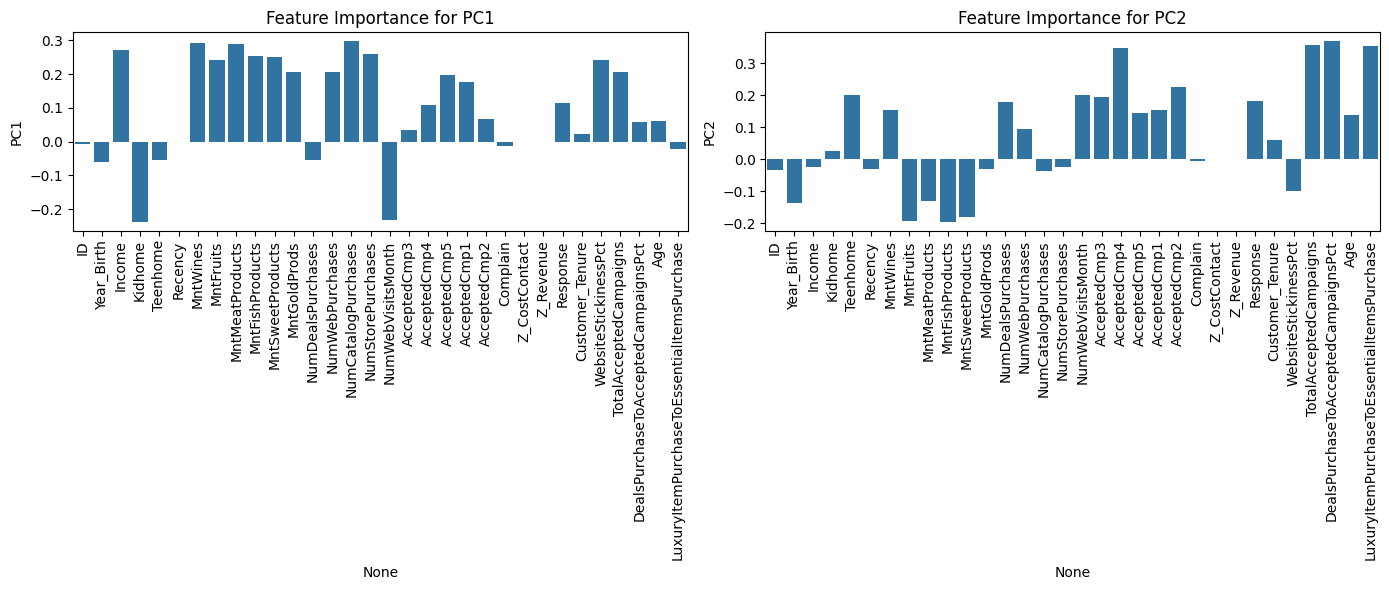

In [16]:
# Get the feature importance for each principal component
feature_importance = pd.DataFrame(pca.components_.T, index=scaled_df.columns, columns=['PC1', 'PC2'])

# Plot the feature importance for each principal component
plt.figure(figsize=(14, 6))

# Plot for PC1
plt.subplot(1, 2, 1)
sns.barplot(x=feature_importance.index, y=feature_importance['PC1'])
plt.title('Feature Importance for PC1')
plt.xticks(rotation=90)

# Plot for PC2
plt.subplot(1, 2, 2)
sns.barplot(x=feature_importance.index, y=feature_importance['PC2'])
plt.title('Feature Importance for PC2')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

In [17]:
# Display the mean values of each feature per cluster to interpret cluster characteristics
cluster_summary = df.groupby('Cluster').mean().round(2)
print("Cluster Analysis Summary:\n", cluster_summary)

Cluster Analysis Summary:
               ID  Year_Birth    Income  Kidhome  Teenhome  Recency  MntWines  \
Cluster                                                                        
0        5620.81     1972.69  34761.25     0.82      0.41    49.24     40.76   
1        5422.97     1962.11  55569.64     0.25      0.99    47.58    425.16   
2        5714.00     1967.74  71953.51     0.06      0.35    50.61    487.18   
3        5565.22     1969.41  80989.01     0.05      0.13    48.43    853.51   

         MntFruits  MntMeatProducts  MntFishProducts  ...  \
Cluster                                               ...   
0             5.87            26.04             8.27  ...   
1            13.40           105.00            17.44  ...   
2            66.93           386.44            96.84  ...   
3            57.09           471.48            82.78  ...   

         Marital_Status_Married  Marital_Status_Single  \
Cluster                                                  
0        